In [49]:
from tenzometer import readCalibration
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import linregress
import os
from datetime import datetime

20

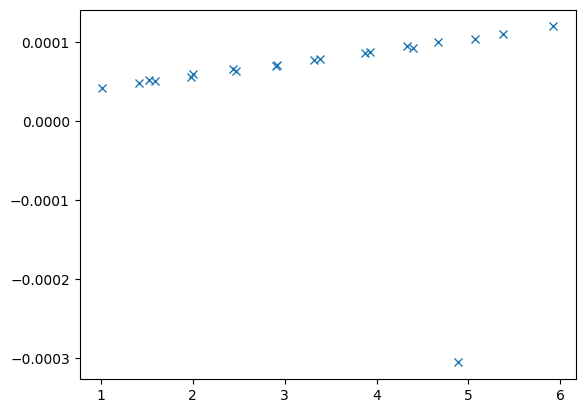

In [50]:
# calib = readCalibration("calibration/Tenzo1-08-05-2023-18-26-23.csv")
calib = readCalibration("calibration/Tenzo1-08-05-2023-19-01-41.csv")
Vlimit = 0.00004
ramps = calib[calib["Status"].isin(["up","down"])]
plt.plot(ramps["F"], ramps["V"],"x")
ramps = ramps.loc[ramps["V"] > Vlimit]

rampsUp = calib[calib["Status"] == "up"]
rampsUp = rampsUp.loc[rampsUp["V"] > Vlimit]

rampsDown = calib[calib["Status"] == "down"]
rampsDown = rampsDown.loc[rampsDown["V"] > Vlimit]
len(ramps)

In [51]:


# def doFit():

slope, intercept, r_value, p_value, std_err  = linregress(ramps["F"],ramps["V"])
F_edges = [0,ramps["F"].max()+0.2]
calibLine = np.array([slope*F_edges[0] + intercept, slope*F_edges[1] + intercept])
print(len(ramps["F"]))
err = np.sqrt(np.sum(np.abs(slope*ramps["F"] + intercept - ramps["V"])**2)/(len(ramps["F"])-1))
calibBorders = np.array([[slope*F_edges[0] + intercept - err, slope*F_edges[1] + intercept - err],
                [slope*F_edges[0] + intercept + err, slope*F_edges[1] + intercept + err]
                ])


20


1.1692310410469303e-06

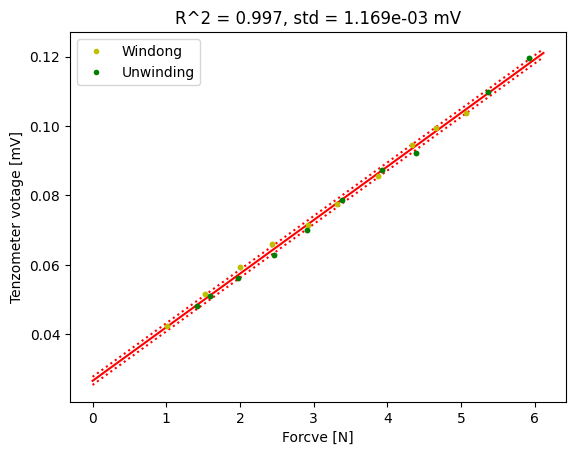

In [52]:


plt.plot(rampsDown["F"],rampsDown["V"]*10**3,".y")
plt.plot(rampsUp["F"],rampsUp["V"]*10**3,".g")
plt.legend(["Windong","Unwinding"])
plt.plot(F_edges, calibBorders[0]*10**3, ":r")
plt.plot(F_edges, calibBorders[1]*10**3, ":r")
plt.plot(F_edges, calibLine*10**3, "-r")
plt.plot(rampsDown["F"],rampsDown["V"]*10**3,".y")
plt.plot(rampsUp["F"],rampsUp["V"]*10**3,".g")

plt.xlabel("Forcve [N]")

plt.ylabel("Tenzometer votage [mV]")
plt.title("R^2 = %1.3f, std = %1.3e mV" %(r_value**2, err*10**3))

err

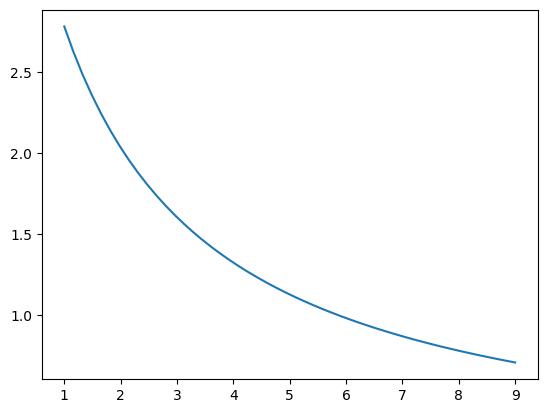

In [53]:
F = np.linspace(1,9)
rel_err = err/(slope*F + intercept)
plt.plot(F,rel_err*100)


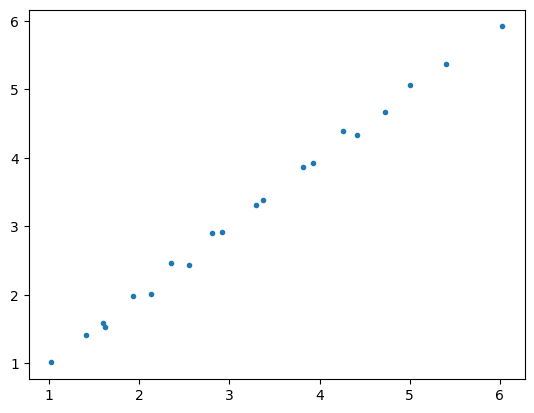

In [54]:
p = [- intercept/slope, 1/slope]
F = ramps["V"]*p[1] + p[0]

plt.plot(F, ramps["F"], ".")

0.07572788275976643

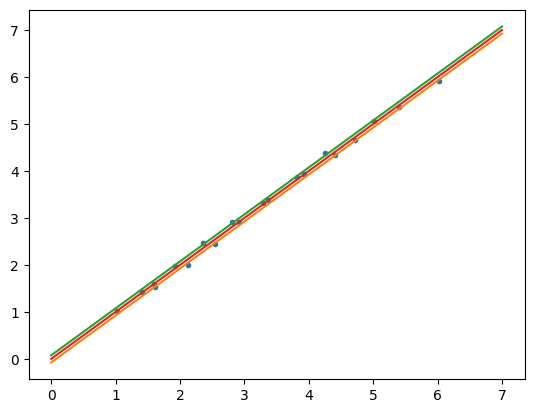

In [55]:
err = np.sqrt(np.sum(np.abs(F - ramps["F"])**2)/(len(F)-1))

errLine = [[ -err, 7 - err],
                [ err, 7 + err]
                ]

plt.plot(F, ramps["F"], ".")
plt.plot([0,7],errLine[0])
plt.plot([0,7],errLine[1])
plt.plot([0,7], [0,7])
err


In [56]:
drift = calib.loc[calib["Status"] == "drift"]
F_set = drift["F_set"].unique()
driftUp = []
driftDown = []
I = calib.loc[calib["Status"] == "up"].index
i0 = 0
for i1 in I:
    driftUp.append(calib.iloc[i0:i1])
    i0 = i1+1

I = calib.loc[calib["Status"] == "down"].index
for i1 in I:
    driftDown.append(calib.iloc[i0:i1])
    i0 = i1+1



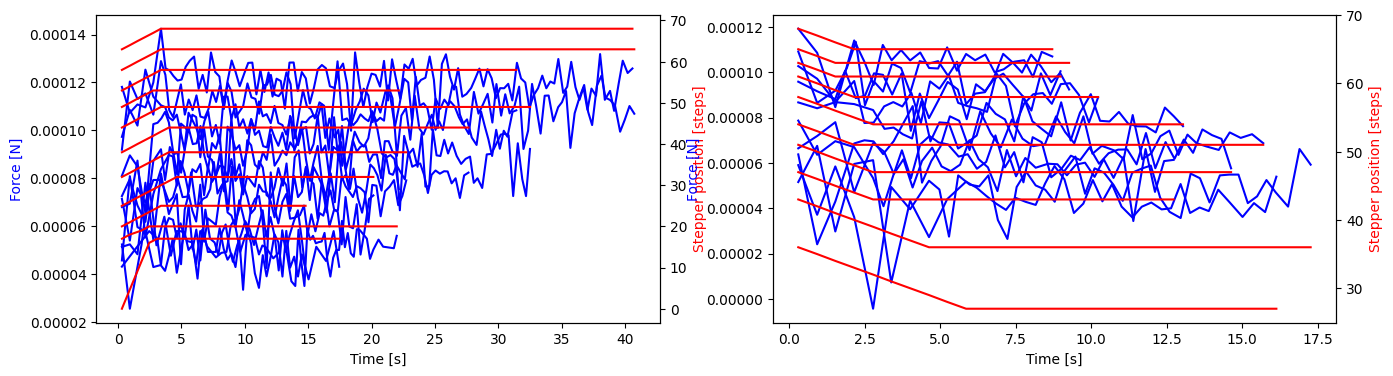

In [57]:
f = plt.figure(figsize=[16,4])
ax0 = f.add_subplot(121)
ax0.set_xlabel("Time [s]")
ax0.set_ylabel("Force [N]", color = "b")
ax1 = ax0.twinx()
ax1.set_ylabel("Stepper position [steps]",color= "r")
for F in driftUp:
    ax0.plot(F["T1"], F["V"],"b")
    ax1.plot(F["T1"], F["x"],"r")


ax0 = f.add_subplot(122)
ax0.set_xlabel("Time [s]")
ax0.set_ylabel("Force [N]", color = "b")
ax1 = ax0.twinx()
ax1.set_ylabel("Stepper position [steps]",color= "r")
for F in driftDown:
    ax0.plot(F["T1"], F["V"],"b")
    ax1.plot(F["T1"], F["x"],"r")